# Data Import and Preparation

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as
import numpy as np

Mounted at /content/drive


In [2]:
def data_info(data: pd.DataFrame):
  """
  Prints the information of a pandas DataFrame.
  Args:
  data: A pandas DataFrame.
  Returns:
  None
  """
  print("=== DataFrame Information ===")
  print(f"Shape of the dataframe: {data.shape}")
  print("\n--- Head of the DataFrame ---")
  print(data.head())
  print("\n--- Missing Values (NA counts) ---")
  print(data.isna().sum())
  print(f"Summary of the data: \n{data.describe()}")

In [4]:
file_path_proteom = "/content/drive/MyDrive/Datasets/TCGA_SKCM/proteomics_data.csv"
file_path_meta = "/content/drive/MyDrive/Datasets/TCGA_SKCM/proteomics_data_meta_data.csv"
df = pd.read_csv(file_path_proteom)
meta = pd.read_csv(file_path_meta)

In [5]:
data_info(df)

=== DataFrame Information ===
Shape of the dataframe: (487, 358)

--- Head of the DataFrame ---
   Unnamed: 0       AGID  lab_id catalog_number set_id peptide_target  \
0           1  AGID00100     882         sc-628    Old       1433BETA   
1           2  AGID00111     913       sc-23957    Old    1433EPSILON   
2           3  AGID00101     883        sc-1019    Old       1433ZETA   
3           4  AGID00001       2           9452    Old          4EBP1   
4           5  AGID00002       3           9456    Old     4EBP1_pS65   

   TCGA-ER-A2NC-06A  TCGA-ER-A2NB-01A  TCGA-GN-A262-06A  TCGA-FS-A1ZT-06A  \
0          0.024065          0.152775          0.009076         -0.038428   
1         -0.130653          0.024821          0.054817          0.105314   
2         -0.380750          0.274175         -0.372885          0.409915   
3          0.605620         -0.202140          0.483870          0.447000   
4          0.187700         -0.132185          0.003985          0.066966   

  

In [6]:
df = df.set_index("AGID")
df.head()

,Unnamed: 0,lab_id,catalog_number,set_id,peptide_target,TCGA-ER-A2NC-06A,TCGA-ER-A2NB-01A,TCGA-GN-A262-06A,TCGA-FS-A1ZT-06A,TCGA-FS-A1ZU-06A,...,TCGA-EE-A2MT-06A,TCGA-D3-A8GN-06A,TCGA-GN-A8LN-01A,TCGA-DA-A1HW-06A,TCGA-EB-A6QY-01A,TCGA-BF-A5EO-01A,TCGA-YD-A9TB-06A,TCGA-BF-A5EP-01A,TCGA-EE-A29N-06A,TCGA-D3-A1Q1-06A
AGID,,,,,,,,,,,,,,,,,,,,,
AGID00100,1,882,sc-628,Old,1433BETA,0.024065,0.152775,0.009076,-0.038428,-0.110190,...,-0.051119,-0.135680,-0.166000,-0.101739,-0.046038,-0.021687,-0.141250,-0.19478,-0.201520,0.121355
AGID00111,2,913,sc-23957,Old,1433EPSILON,-0.130653,0.024821,0.054817,0.105314,-0.126650,...,-0.133172,0.067445,0.013337,-0.121297,0.087037,-0.129020,0.061599,-0.09477,-0.200060,0.184605
AGID00101,3,883,sc-1019,Old,1433ZETA,-0.380750,0.274175,-0.372885,0.409915,0.834725,...,-0.113602,-0.058189,-0.121480,-0.031830,-0.168820,1.188900,-0.096893,0.03651,0.076050,0.364150
AGID00001,4,2,9452,Old,4EBP1,0.605620,-0.202140,0.483870,0.447000,1.008355,...,0.580920,0.577470,0.692430,0.686210,0.528540,0.227430,0.517750,0.33301,0.291215,0.030857
AGID00002,5,3,9456,Old,4EBP1_pS65,0.187700,-0.132185,0.003985,0.066966,0.195640,...,0.521520,-0.369570,0.031801,0.508550,0.562660,-0.021737,-0.267880,0.42748,0.206480,-0.427805


In [8]:
df2 = df.drop(["Unnamed: 0", "lab_id", "catalog_number", "set_id", "peptide_target"], axis = 1)
df2.shape

(487, 352)

In [10]:
df2.sample(5)

,TCGA-ER-A2NC-06A,TCGA-ER-A2NB-01A,TCGA-GN-A262-06A,TCGA-FS-A1ZT-06A,TCGA-FS-A1ZU-06A,TCGA-EE-A2MR-06A,TCGA-EE-A184-06A,TCGA-ER-A193-06A,TCGA-EE-A3AD-06A,TCGA-ER-A19O-06A,...,TCGA-EE-A2MT-06A,TCGA-D3-A8GN-06A,TCGA-GN-A8LN-01A,TCGA-DA-A1HW-06A,TCGA-EB-A6QY-01A,TCGA-BF-A5EO-01A,TCGA-YD-A9TB-06A,TCGA-BF-A5EP-01A,TCGA-EE-A29N-06A,TCGA-D3-A1Q1-06A
AGID,,,,,,,,,,,,,,,,,,,,,
AGID00282,0.422569,0.084223,0.574474,0.652516,0.429812,0.727262,0.862617,0.425336,0.777681,0.222074,...,0.512847,0.133940,0.399466,0.643937,0.256765,-1.980554,1.001391,0.043995,0.635495,0.510975
AGID00436,0.340776,0.229919,-0.006522,-0.015559,-0.091785,-0.106986,0.322106,-0.041556,-0.101228,-0.018810,...,0.166207,0.396574,-0.124363,0.240780,-0.364343,0.533463,0.028588,0.027256,-0.043793,0.891118
AGID00210,-0.371289,-0.303779,0.083141,-0.068961,0.014630,-0.067154,-0.449963,0.010202,-0.390723,0.150424,...,-0.154218,-0.023219,-0.297009,-0.427483,0.128995,0.465251,-0.166298,-0.163193,-0.389103,-0.327794
AGID00188,0.231510,-0.078574,-0.188736,0.237800,0.244270,0.308105,0.088650,0.259490,0.134680,0.063859,...,0.306245,0.230370,0.317890,-0.005660,-0.170120,-0.226780,0.106110,-0.191810,0.346535,0.060410
AGID00396,-0.758836,-0.135249,-0.048467,-0.091820,1.401122,-0.670882,0.304384,0.791244,0.879439,0.515417,...,-0.145708,0.674915,0.706800,0.347737,0.733640,-0.775412,0.571905,0.817461,-0.043697,1.451538


In [11]:
df3 = df2.T
df3.shape

(352, 487)

In [68]:
df3.head()

AGID,AGID00100,AGID00111,AGID00101,AGID00001,AGID00002,AGID00003,AGID00443,AGID00120,AGID00004,AGID00005,...,AGID00349,AGID02137,AGID00088,AGID00089,AGID00504,AGID00095,AGID02217,AGID02210,AGID00326,AGID00432
TCGA-ER-A2NC-06A,0.024065,-0.130653,-0.380750,0.605620,0.187700,0.648615,-0.027009,0.978660,0.390130,0.089907,...,0.289248,0.081126,0.117872,0.771030,0.128620,0.113600,0.276734,0.556658,-1.417570,0.433673
TCGA-ER-A2NB-01A,0.152775,0.024821,0.274175,-0.202140,-0.132185,-0.728500,-0.261150,-1.562700,-0.100623,-0.064589,...,-0.156683,-0.137355,0.231305,-0.278440,-0.309690,0.299440,-2.112819,-1.004252,-0.830005,-0.428436
TCGA-GN-A262-06A,0.009076,0.054817,-0.372885,0.483870,0.003985,0.922870,0.004535,0.452375,0.938475,0.727375,...,-0.233315,0.392380,-0.462660,-0.161851,0.053655,0.138959,1.160716,0.367487,-0.871130,-0.359398
TCGA-FS-A1ZT-06A,-0.038428,0.105314,0.409915,0.447000,0.066966,-0.018515,0.268095,0.641885,-0.135997,-0.554745,...,-0.094254,0.034880,-0.219020,-0.297090,-0.019804,0.812640,0.218110,0.660956,-1.240833,-0.057830
TCGA-FS-A1ZU-06A,-0.110190,-0.126650,0.834725,1.008355,0.195640,-0.418325,-0.231590,0.173192,0.278180,0.452630,...,-0.207142,0.592025,-0.292395,-1.044530,0.497110,0.351090,0.910867,1.891081,-1.782752,-0.238856


## Plot the NaNs

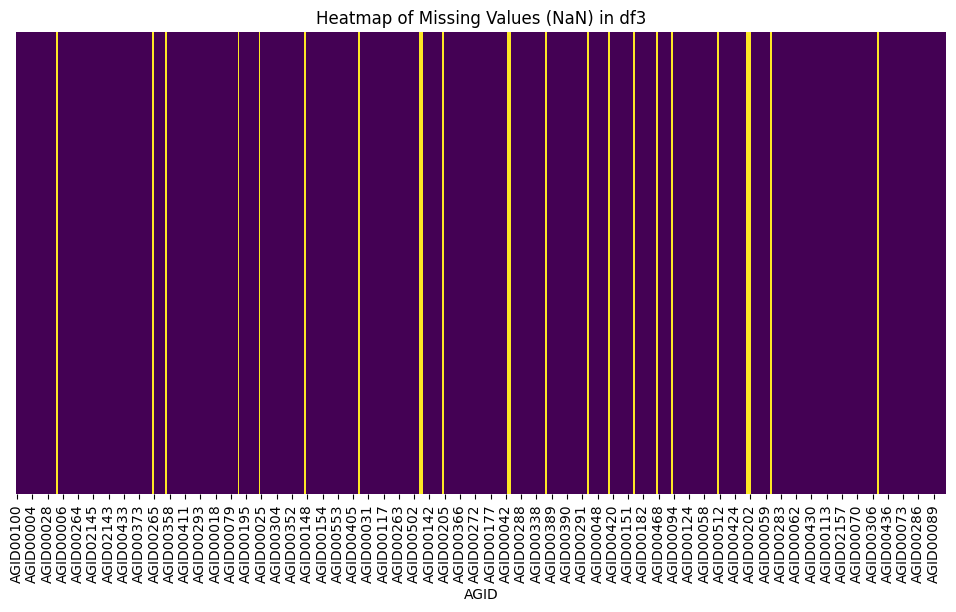

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of NaN values
plt.figure(figsize=(12, 6))  # Set figure size
sns.heatmap(df3.isna(), cmap="viridis", cbar=False, yticklabels=False)

plt.title("Heatmap of Missing Values (NaN) in df3")
plt.show()


In [14]:
"Sample_type" in meta.columns

False

In [15]:
meta.columns

Index(['Unnamed: 0', 'id', 'data_format', 'cases', 'access', 'file_name',
       'submitter_id', 'data_category', 'type', 'platform', 'file_size',
       'created_datetime', 'md5sum', 'updated_datetime', 'file_id',
       'data_type', 'state', 'experimental_strategy', 'version',
       'data_release', 'project', 'sample_type', 'is_ffpe',
       'cases.submitter_id', 'sample.submitter_id'],
      dtype='object')

In [17]:
Sample_type = meta["sample_type"]
Sample_type.head()

,sample_type
0,Metastatic
1,Primary Tumor
2,Metastatic
3,Metastatic
4,Metastatic


In [18]:
labels = {
    "Metastatic": 1,
    "Primary Tumor": 0
}
Sample_type2 = Sample_type.map(labels)
Sample_type2.head()

,sample_type
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0


In [23]:
Sample_type2.shape

(352,)

In [44]:
df3.shape

(352, 487)

In [25]:
print(type(Sample_type2))

<class 'pandas.core.series.Series'>


## Handle Missing Values

In [47]:
Sample_type2.isna().sum()

1

In [48]:
most_frequent = Sample_type2.mode()[0]
most_frequent

1.0

In [49]:
Sample_type3 = Sample_type2.fillna(most_frequent)
Sample_type3.isna().sum()

0

In [63]:
df3.isna().sum().sum()

10916

In [69]:
for col in df3.columns:
    if df3[col].isna().all():  # Skip if column is fully NaN
        print(f"Skipping column {col} (fully NaN)")
        continue
    mode = df3[col].mode().iloc[0]  # Use .iloc[0] to avoid index errors
    df3[col] = df3[col].fillna(mode)
print(f"After handling missing values the number of missing values: {df3.isna().sum().sum()}")

Skipping column AGID00498 (fully NaN)
Skipping column AGID00345 (fully NaN)
Skipping column AGID00537 (fully NaN)
Skipping column AGID00141 (fully NaN)
Skipping column AGID00536 (fully NaN)
Skipping column AGID00211 (fully NaN)
Skipping column AGID00485 (fully NaN)
Skipping column AGID00129 (fully NaN)
Skipping column AGID00130 (fully NaN)
Skipping column AGID00419 (fully NaN)
Skipping column AGID00119 (fully NaN)
Skipping column AGID00533 (fully NaN)
Skipping column AGID00503 (fully NaN)
Skipping column AGID00216 (fully NaN)
Skipping column AGID00257 (fully NaN)
Skipping column AGID00545 (fully NaN)
Skipping column AGID00370 (fully NaN)
Skipping column AGID00413 (fully NaN)
Skipping column AGID00126 (fully NaN)
Skipping column AGID00200 (fully NaN)
Skipping column AGID00535 (fully NaN)
Skipping column AGID00202 (fully NaN)
Skipping column AGID00547 (fully NaN)
Skipping column AGID00144 (fully NaN)
After handling missing values the number of missing values: 8448


### Droping Columns with Fully NaN values

In [73]:
cont = 0
for col in df3.columns:
  if df3[col].isna().all():
    print(f"Droping column: {col} as it has all NaN values.")
    df3.drop(col, axis = 1, inplace = True)
  else:
    cont += 1
    if cont % 100 == 0:
      print(f"Skipping the column: {col}")

Skipping the column: AGID00234
Skipping the column: AGID00396
Skipping the column: AGID00105
Skipping the column: AGID00255


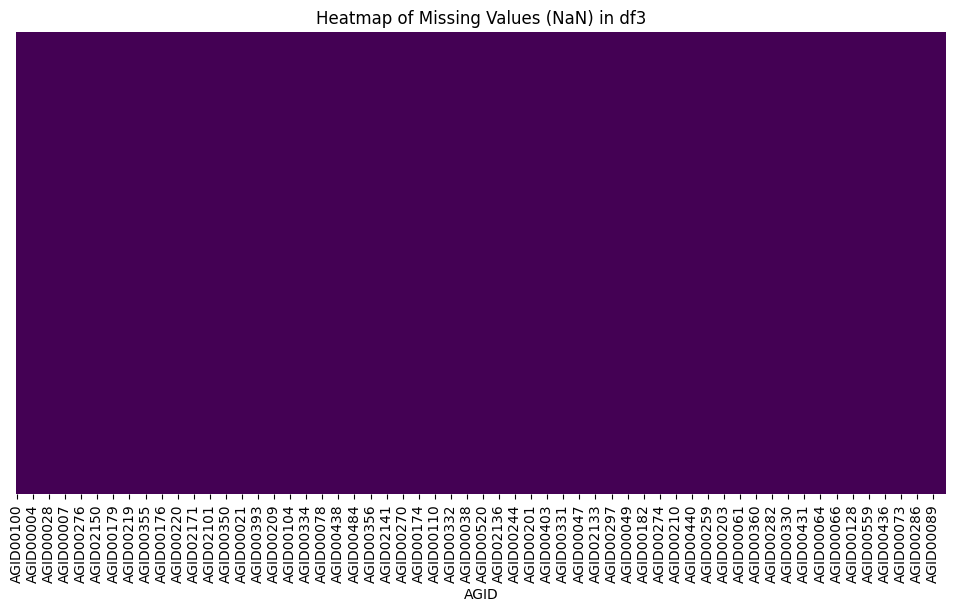

In [74]:
# Create a heatmap of NaN values
plt.figure(figsize=(12, 6))  # Set figure size
sns.heatmap(df3.isna(), cmap="viridis", cbar=False, yticklabels=False)

plt.title("Heatmap of Missing Values (NaN) in df3")
plt.show()

In [38]:
Sample_type2

,sample_type
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
347,0.0
348,1.0
349,0.0
350,1.0


In [28]:
df3.drop("Sample_type", axis = 1, inplace = True)
df3.shape

(352, 487)

AGID,AGID00100,AGID00111,AGID00101,AGID00001,AGID00002,AGID00003,AGID00443,AGID00120,AGID00004,AGID00005,...,AGID02137,AGID00088,AGID00089,AGID00504,AGID00095,AGID02217,AGID02210,AGID00326,AGID00432,Sample_type
TCGA-ER-A2NC-06A,0.024065,-0.130653,-0.380750,0.605620,0.187700,0.648615,-0.027009,0.978660,0.390130,0.089907,...,0.081126,0.117872,0.771030,0.128620,0.113600,0.276734,0.556658,-1.417570,0.433673,NaN
TCGA-ER-A2NB-01A,0.152775,0.024821,0.274175,-0.202140,-0.132185,-0.728500,-0.261150,-1.562700,-0.100623,-0.064589,...,-0.137355,0.231305,-0.278440,-0.309690,0.299440,-2.112819,-1.004252,-0.830005,-0.428436,NaN
TCGA-GN-A262-06A,0.009076,0.054817,-0.372885,0.483870,0.003985,0.922870,0.004535,0.452375,0.938475,0.727375,...,0.392380,-0.462660,-0.161851,0.053655,0.138959,1.160716,0.367487,-0.871130,-0.359398,NaN
TCGA-FS-A1ZT-06A,-0.038428,0.105314,0.409915,0.447000,0.066966,-0.018515,0.268095,0.641885,-0.135997,-0.554745,...,0.034880,-0.219020,-0.297090,-0.019804,0.812640,0.218110,0.660956,-1.240833,-0.057830,NaN
TCGA-FS-A1ZU-06A,-0.110190,-0.126650,0.834725,1.008355,0.195640,-0.418325,-0.231590,0.173192,0.278180,0.452630,...,0.592025,-0.292395,-1.044530,0.497110,0.351090,0.910867,1.891081,-1.782752,-0.238856,NaN


# Train Test Split and Custom Dataset

In [29]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, Dataset
import torch.optim as optim

In [75]:
scaler = StandardScaler()
feature_normalize = scaler.fit_transform(df3)

In [76]:
feature_normalize[:5], Sample_type3[:5]

(array([[ 0.28191869, -0.75466155, -1.33599635, ...,  0.89425752,
         -0.78593291,  1.46651393],
        [ 1.04936151,  0.24621769,  0.77556201, ..., -1.29900296,
          0.13215884, -0.59903167],
        [ 0.19254235,  0.4393199 , -1.31063863, ...,  0.62844992,
          0.06789942, -0.43362196],
        [-0.09070185,  0.76439611,  1.21320438, ...,  1.0408088 ,
         -0.50977508,  0.28891098],
        [-0.51859268, -0.72889184,  2.58284381, ...,  2.76927763,
         -1.35654271, -0.1448114 ]]),
 0    1.0
 1    0.0
 2    1.0
 3    1.0
 4    1.0
 Name: sample_type, dtype: float64)

In [77]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_normalize, Sample_type3, test_size=0.2, random_state=42
)

In [78]:

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train.to_numpy())
y_test_tensor = torch.LongTensor(y_test.to_numpy())

In [79]:
# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [80]:
# --------------------------
# 2. Autoencoder for Feature Selection
# --------------------------

class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, latent_dim),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, input_dim),
        )

    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed, latent

In [100]:
df3.shape

(352, 463)

In [101]:
# Hyperparameters
input_dim = X_train.shape[1]
latent_dim = 200 # Bottleneck layer (selected features)
lr = 0.001
epochs = 10

# Initialize model, loss, optimizer
autoencoder = Autoencoder(input_dim, latent_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=lr)

In [102]:
autoencoder

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=463, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=200, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=200, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=463, bias=True)
  )
)

In [103]:
# Train Autoencoder
autoencoder.train()
for epoch in range(epochs):
    for batch_X, _ in train_loader:  # Unsupervised (no labels needed)
        optimizer.zero_grad()
        reconstructed, latent = autoencoder(batch_X)
        loss = criterion(reconstructed, batch_X)
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.8944
Epoch [2/10], Loss: 0.6982
Epoch [3/10], Loss: 0.5457
Epoch [4/10], Loss: 0.5558
Epoch [5/10], Loss: 0.6009
Epoch [6/10], Loss: 0.5559
Epoch [7/10], Loss: 0.4678
Epoch [8/10], Loss: 0.4075
Epoch [9/10], Loss: 0.4216
Epoch [10/10], Loss: 0.3744


In [104]:
# Extract latent features (selected features)
autoencoder.eval()
with torch.no_grad():
    X_train_latent = autoencoder.encoder(X_train_tensor)
    X_test_latent = autoencoder.encoder(X_test_tensor)

In [105]:
X_train_latent.shape, X_test_latent.shape

(torch.Size([281, 200]), torch.Size([71, 200]))

In [106]:
# --------------------------
# 3. Transformer Model
# --------------------------
"""
class GeneTransformer(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=4, num_layers=2):
        super(GeneTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        self.pos_encoder = nn.Parameter(torch.randn(1, 1, d_model))  # Learnable positional encoding
        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead)
        self.transformer = nn.TransformerEncoder(encoder_layers, num_layers)
        self.classifier = nn.Linear(d_model, num_classes)

    def forward(self, x):
        x = self.embedding(x)  # (batch, seq_len=1, d_model)
        x = x + self.pos_encoder
        x = self.transformer(x)
        x = x.mean(dim=1)  # Global average pooling
        x = self.classifier(x)
        return x
"""
import torch
import torch.nn as nn

class GeneTransformer(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=4, num_layers=2, dropout=0.1):  # Add dropout parameter
        super(GeneTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        self.pos_encoder = nn.Parameter(torch.randn(1, 1, d_model))
        self.dropout = nn.Dropout(dropout)  # Dropout layer for embedding output

        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead, dropout=dropout) # Dropout in Transformer layer
        self.transformer = nn.TransformerEncoder(encoder_layers, num_layers)

        self.classifier = nn.Sequential( # Classifier with dropout
            nn.Linear(d_model, d_model//2), # Intermediate layer
            nn.Dropout(dropout), # Dropout before the final layer
            nn.ReLU(),
            nn.Linear(d_model//2, num_classes)
        )

    def forward(self, x):
        x = self.embedding(x)  # (batch, seq_len=1, d_model)
        x = self.dropout(x) # Apply dropout after embedding
        x = x + self.pos_encoder
        x = self.transformer(x)
        x = x.mean(dim=1)  # Global average pooling
        x = self.classifier(x)
        return x

In [107]:
len(np.unique(labels))

1

In [108]:
# Hyperparameters
num_classes = len(np.unique(labels))  # Adjust for your task
d_model = 256  # Embedding dimension
nhead = 4     # Number of attention heads
num_layers = 4

# Initialize Transformer
transformer = GeneTransformer(latent_dim, num_classes, d_model, nhead, num_layers)
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = optim.Adam(transformer.parameters(), lr=0.001)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [109]:
# Train Transformer on latent features
epochs = 10
transformer.train()
for epoch in range(epochs):
    for batch_X, batch_y in train_loader:
        # print(batch_y)
        latent_X = autoencoder.encoder(batch_X)  # Use pre-trained encoder
        outputs = transformer(latent_X.unsqueeze(1))  # Add dummy sequence dimension
        # print(outputs)
        loss = criterion(outputs, batch_y.unsqueeze(1).float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/30], Loss: {loss.item():.4f}")

Epoch [1/30], Loss: 0.5992
Epoch [2/30], Loss: 0.4594
Epoch [3/30], Loss: 0.6119
Epoch [4/30], Loss: 0.5595
Epoch [5/30], Loss: 0.5679
Epoch [6/30], Loss: 0.6342
Epoch [7/30], Loss: 0.6141
Epoch [8/30], Loss: 0.5448
Epoch [9/30], Loss: 0.5623
Epoch [10/30], Loss: 0.7155


In [110]:
transformer.eval()
with torch.no_grad():
    test_outputs = transformer(X_test_latent.unsqueeze(1))
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.3239
